# Credit Score

## Project Description

## Import Libraries and Dataset

In [13]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

#Display all columns
pd.set_option('display.max_columns', 999)

In [14]:
train_df = pd.read_csv('Train.csv')
train_df.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,AmountLoan,Currency,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,9/21/2018 12:17,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,9/25/2018 9:20,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,9/25/2018 10:33,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,9/27/2018 10:26,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,9/27/2018 12:44,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Checking Na values
train_df.isna().sum()

CustomerId                 0
TransactionStartTime       0
Value                      0
Amount                     0
TransactionId              0
BatchId                    0
SubscriptionId             0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
TransactionStatus          0
IssuedDateLoan           612
AmountLoan               612
Currency                 612
LoanId                   612
PaidOnDate               612
IsFinalPayBack           612
InvestorId               612
DueDate                  614
LoanApplicationId        617
PayBackId                612
ThirdPartyId             614
IsThirdPartyConfirmed    612
IsDefaulted              612
dtype: int64

In [16]:
#Checking Unique values
train_df.nunique()

CustomerId                421
TransactionStartTime     1606
Value                      98
Amount                     77
TransactionId            1758
BatchId                  1713
SubscriptionId              6
CurrencyCode                1
CountryCode                 1
ProviderId                  1
ProductId                  16
ProductCategory             7
ChannelId                   1
TransactionStatus           2
IssuedDateLoan           1101
AmountLoan                647
Currency                    1
LoanId                   1159
PaidOnDate               1427
IsFinalPayBack              2
InvestorId                  3
DueDate                  1101
LoanApplicationId        1156
PayBackId                1485
ThirdPartyId             1481
IsThirdPartyConfirmed       2
IsDefaulted                 2
dtype: int64

## Defaulted caracteristics

In [29]:
#Select only defaulted
df_defaulted = train_df[(train_df['IsDefaulted'] == 1)]
#Group defaulted customer by CustomerId
groupby_CustomerId = df_defaulted.groupby('CustomerId').sum()
len(groupby_CustomerId)

69

In [27]:
#Average defaulted loans
groupby_CustomerId.AmountLoan.describe()

count        69.000000
mean      47164.202899
std       48226.195458
min         500.000000
25%        5000.000000
50%       35000.000000
75%       64000.000000
max      192000.000000
Name: AmountLoan, dtype: float64

In [28]:
groupby_CustomerId

,Value,Amount,CountryCode,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted
CustomerId,,,,,,,,
CustomerId_10,1344000.0,-1344000.0,1792,7,97000.0,0.0,7.0,7.0
CustomerId_116,1536000.0,-1536000.0,2048,8,128000.0,0.0,7.0,8.0
CustomerId_117,192000.0,-192000.0,256,1,46000.0,0.0,1.0,1.0
CustomerId_120,8000.0,-8000.0,512,2,4780.0,0.0,2.0,2.0
CustomerId_124,684000.0,-684000.0,512,2,64000.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...
CustomerId_63,576000.0,-576000.0,768,3,25000.0,0.0,3.0,3.0
CustomerId_65,342000.0,-342000.0,256,1,64000.0,0.0,1.0,1.0
CustomerId_76,192000.0,-192000.0,256,1,32000.0,0.0,1.0,1.0


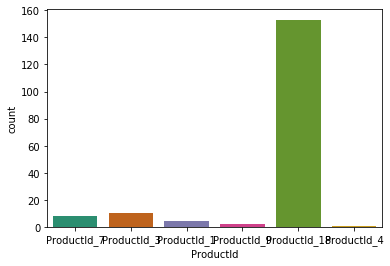

In [30]:
m = sns.countplot(data=df_defaulted, x = 'ProductId', palette='Dark2')

In [31]:
df_defaulted.nunique()

CustomerId                69
TransactionStartTime      53
Value                     12
Amount                    11
TransactionId             71
BatchId                   71
SubscriptionId             3
CurrencyCode               1
CountryCode                1
ProviderId                 1
ProductId                  6
ProductCategory            4
ChannelId                  1
TransactionStatus          1
IssuedDateLoan            53
AmountLoan                42
Currency                   1
LoanId                    71
PaidOnDate               177
IsFinalPayBack             2
InvestorId                 2
DueDate                   54
LoanApplicationId         71
PayBackId                178
ThirdPartyId             175
IsThirdPartyConfirmed      2
IsDefaulted                1
dtype: int64